In [58]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [54]:
data_dict = datasets.load_iris()
x, y = data_dict['data'], data_dict['target']
subset_idx = [idx for idx,label in enumerate(y) if label==0 or label==1]
x, y = x[subset_idx][:, [2, 3]], y[subset_idx]
print(x.shape, y.shape)
print(len(set(y)))

(100, 2) (100,)
2


In [55]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, stratify=y)
x_train_std = (x_train - x_train.mean())/x_train.std()
x_test_std = (x_test - x_train.mean())/x_train.std()

In [79]:
svm = SVC(kernel='linear', C=1.0)

svm.fit(x_train_std, y_train)
w = svm.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-1, 5)
yy = a * xx - (svm.intercept_[0]) / w[1]

margin = 1 / np.sqrt(np.sum(svm.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

print(f"train score: {svm.score(x_train_std, y_train):.4f}")
print(f"test score: {svm.score(x_test_std, y_test):.4f}")

train score: 1.0000
test score: 1.0000


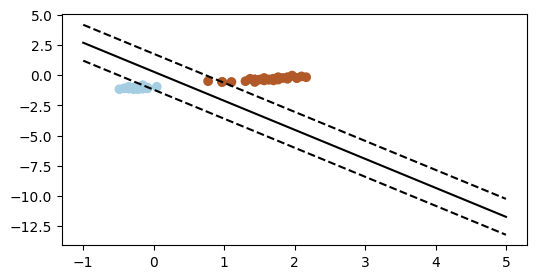

In [80]:
plt.figure(figsize=(6, 3))
plt.scatter(x_train_std[:, 0], x_train_std[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.show()